# Text Data Explanation Benchmarking: Abstractive Summarization

This notebook demonstrates how to use the benchmark utility to benchmark the performance of an explainer for text data. In this demo, we showcase explanation performance for partition explainer on an Abstractive Summarization model. The metric used to evaluate is "keep positive". The masker used is Text Masker.

The new benchmark utility uses the new API with MaskedModel as wrapper around user-imported model and evaluates masked values of inputs.

In [1]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
import nlp
import shap
import shap.benchmark as benchmark

### Load Data and Model

In [2]:
tokenizer = AutoTokenizer.from_pretrained("sshleifer/distilbart-xsum-12-6")
model =  AutoModelForSeq2SeqLM.from_pretrained("sshleifer/distilbart-xsum-12-6")

In [3]:
dataset = nlp.load_dataset('xsum',split='train')

Using custom data configuration default


In [4]:
s = dataset['document'][0:1]

### Create Explainer Object

In [5]:
explainer = shap.Explainer(model,tokenizer)

explainers.Partition is still in an alpha state, so use with caution...


### Run SHAP Explanation

In [6]:
shap_values = explainer(s)

Partition explainer: 2it [00:39, 19.56s/it]                                                                     


### Define Metrics (Sort Order & Perturbation Method)

In [7]:
sort_order = 'positive'
perturbation = 'keep'

### Benchmark Explainer

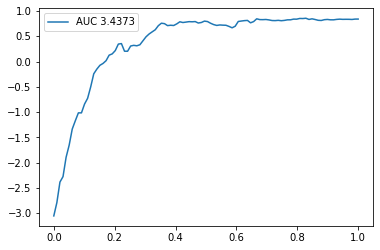

In [8]:
sp = benchmark.perturbation.SequentialPerturbation(explainer.model, explainer.masker, sort_order, perturbation)
xs, ys, auc = sp.model_score(shap_values, s)
sp.plot(xs, ys, auc)